<a href="https://colab.research.google.com/github/Elish-Ab/Brent-Oil-Price-Prediction/blob/main/notebooks/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Install necessary libraries
%pip install statsmodels seaborn scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [23]:
df = pd.read_csv('/home/elisha-a/week10/data/BrentOilPrices.csv')

In [24]:
# Display the first few rows of the dataset
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [25]:
# Check for missing values
print(df.isnull().sum())

Date     0
Price    0
dtype: int64


/tmp/ipykernel_407484/2635750377.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
/tmp/ipykernel_407484/2635750377.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


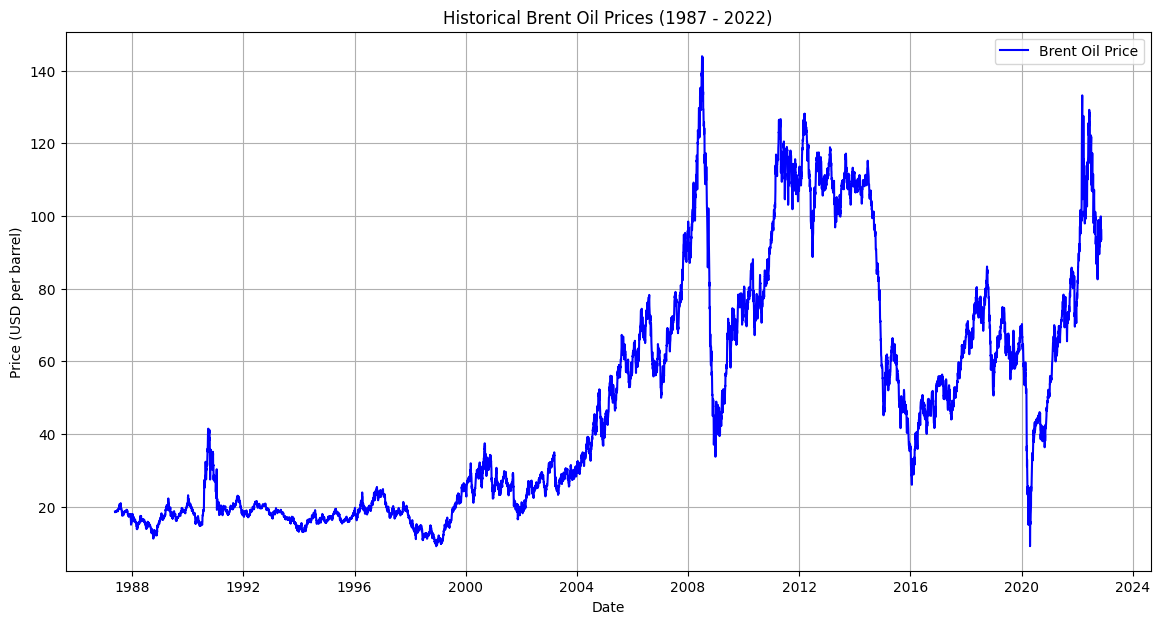

In [26]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.set_index('Date', inplace=True)

# Check for missing values and handle them
df = df.dropna()
# Plot the Brent oil prices over time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Price'], label='Brent Oil Price', color='blue')
plt.title('Historical Brent Oil Prices (1987 - 2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.grid()
plt.show()

In [27]:


# Check the length of the dataset
print(f"Length of the dataset: {len(df)}")


Length of the dataset: 9011


In [28]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Price    0
dtype: int64


Missing values after setting frequency:
Price    3952
dtype: int64
Missing values after filling:
Price    0
dtype: int64


/tmp/ipykernel_407484/1336993946.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_407484/1336993946.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Price'].fillna(method='ffill', inplace=True)


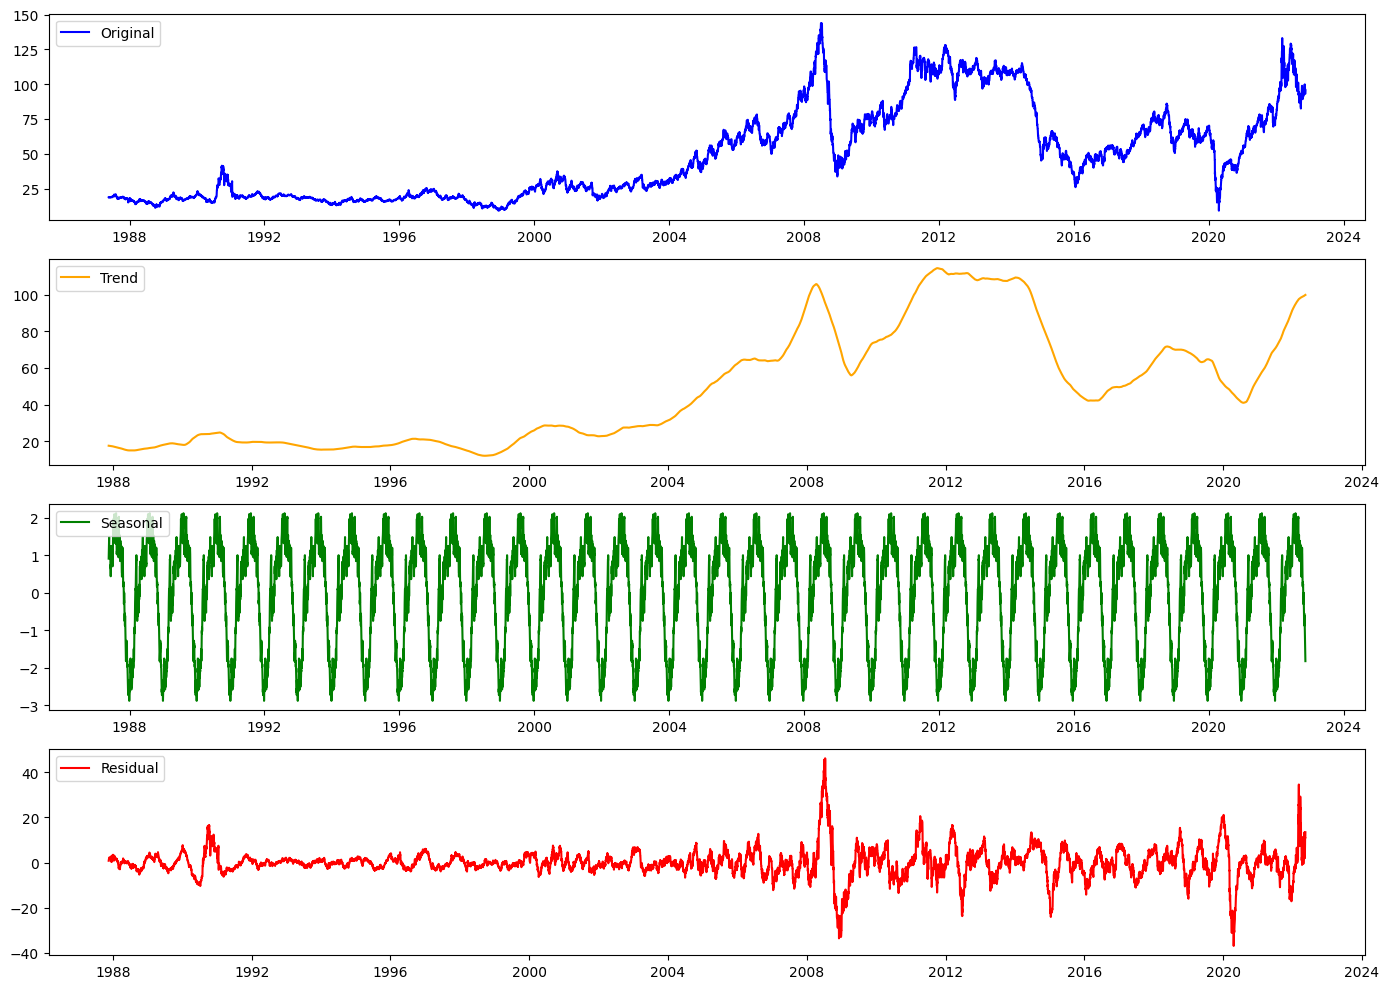

In [29]:

# Set frequency to daily
df = df.asfreq('D')

# Check for missing values after setting frequency
print("Missing values after setting frequency:")
print(df.isnull().sum())

# Fill missing values using forward fill method
df['Price'].fillna(method='ffill', inplace=True)


# Verify that there are no more missing values
print("Missing values after filling:")
print(df.isnull().sum())

# Ensure that we have enough data points for decomposition
if len(df) < 365:
    print("Warning: Not enough data for yearly seasonal decomposition. Adjust the period accordingly.")
else:
    # Decompose the time series (using a period of 365 for yearly seasonality)
    decomposition = seasonal_decompose(df['Price'], model='additive', period=365)

    # Extract the components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot the decomposition
    plt.figure(figsize=(14, 10))
    plt.subplot(411)
    plt.plot(df['Price'], label='Original', color='blue')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='orange')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal', color='green')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residual', color='red')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

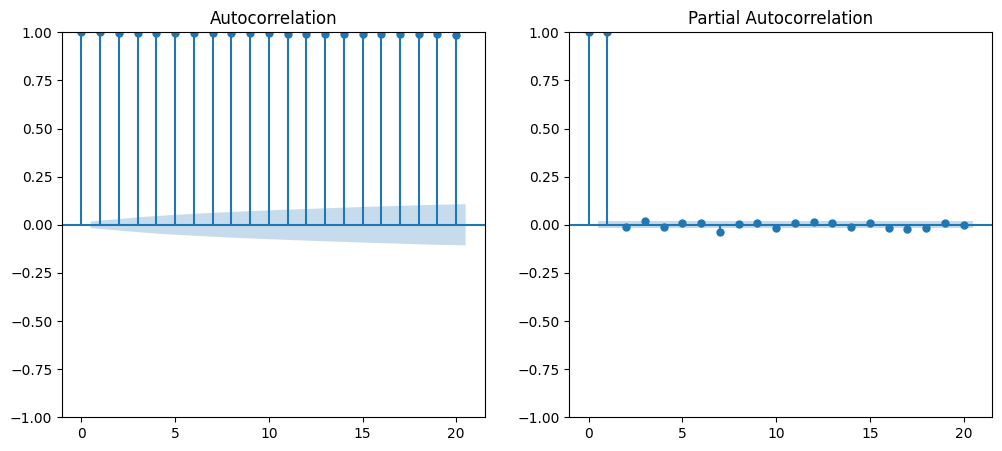

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                12963
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -18569.935
Date:                Sun, 09 Mar 2025   AIC                          37145.870
Time:                        02:58:02   BIC                          37168.280
Sample:                    05-20-1987   HQIC                         37153.359
                         - 11-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8174      0.080    -10.231      0.000      -0.974      -0.661
ma.L1          0.8281      0.077     10.716      0.000       0.677       0.980
sigma2         1.0278      0.004    266.172      0.0

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to determine p and q
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_acf(df['Price'], ax=plt.gca(), lags=20)
plt.subplot(122)
plot_pacf(df['Price'], ax=plt.gca(), lags=20)
plt.show()

# Fit the ARIMA model (p=1, d=1, q=1 as an example)
model = ARIMA(df['Price'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


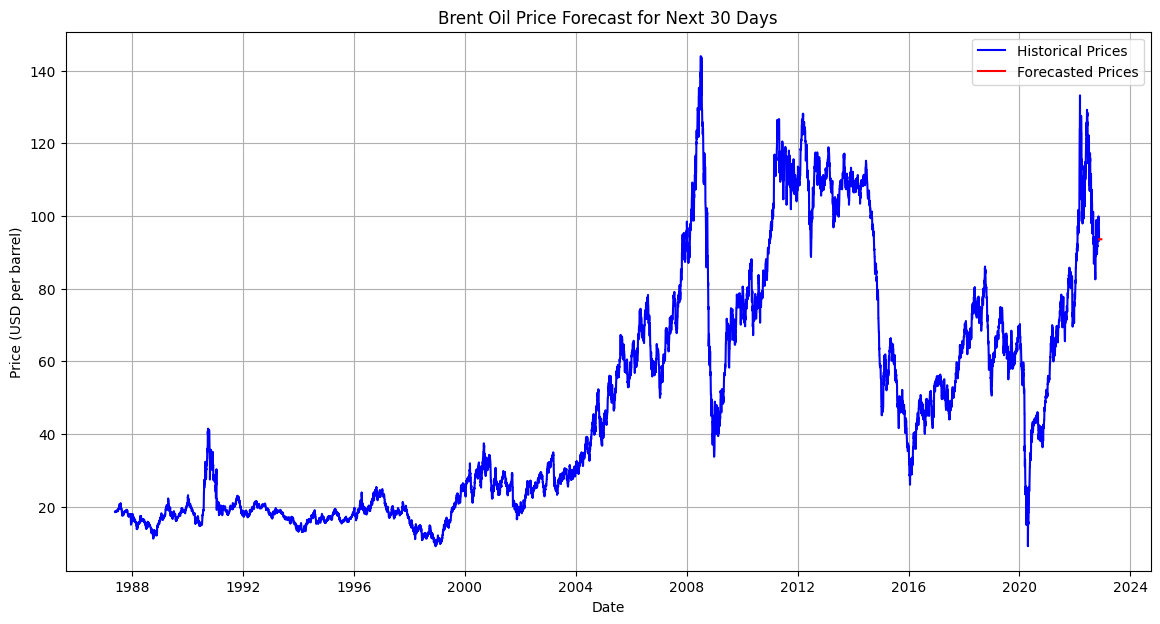

In [31]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(df['Price'], label='Historical Prices', color='blue')
plt.plot(forecast_index, forecast, label='Forecasted Prices', color='red')
plt.title('Brent Oil Price Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.grid()
plt.show()


In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate predictions for the historical data
df['Predicted'] = model_fit.fittedvalues
# Calculate MSE
mse = mean_squared_error(df['Price'], df['Predicted'])

# Calculate RMSE manually
rmse = np.sqrt(mse)

# Print the error metrics
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

model_fit.save('brent_oil_price_model.pkl')

Mean Absolute Error: 0.526249731290321
Root Mean Squared Error: 1.0268815483451788
